<a href="https://colab.research.google.com/github/msouto/20232_Estatistica_para_Engenharia/blob/main/Ex_1_Tabela_de_estat%C3%ADstica_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabela de estatística descritiva

In [ ]:
import numpy as np

D = [70, 99, 36, 27, 81, 61, 72, 26, 56, 98, 26, 33, 92, 73, 45, 42,
     97, 48, 99, 93, 49, 80, 22, 58, 75, 49, 74, 67, 72, 71, 73,
     82, 52, 62, 72]
N = len(D) #Cálculo do número de elementos no vetor D
print(N) #Impressão do valor de N


35


## Passo 1 - Cálculo do número de classes

**Regra de Sturges**



In [ ]:
K = 1 + round(3.3 * np.log10(N))
print(K)

6


## Passo 2 - Cálculo da amplitude da classe

In [ ]:
H = round( ( max(D) - min(D) ) / K )
print(H)

13


## Passo 3 - Classificação

In [ ]:
i = 0
while i < K:
  print(f"{min(D) + i*H} |- {min(D) + i*H + H}: ", end="")
  print(sum(1 for y in D if (y >= min(D)+i*H and y < min(D) + i*H +H)))
  i+=1

22 |- 35: 5
35 |- 48: 3
48 |- 61: 6
61 |- 74: 10
74 |- 87: 5
87 |- 100: 6


### Comparando com CHATGPT

In [ ]:
from prettytable import PrettyTable
import math
import matplotlib.pyplot as plt
import numpy as np
from statistics import median, mode

# Seu conjunto de dados D
D = [70, 99, 36, 27, 81, 61, 72, 26, 56, 98, 26, 33, 92, 73, 45, 42,
     97, 48, 99, 93, 49, 80, 22, 58, 75, 49, 74, 67, 72, 71, 73,
     82, 52, 62, 72]

# Tamanho da amostra
N = len(D)

# Calculando o número de classes usando a regra de Sturges
K = 1 + round(3.3 * math.log10(N))

# Largura da classe (H)
H = round ( (max(D) - min(D)) / K )

# Inicializando i
i = 0

# Inicializando variáveis para os cálculos
soma_xi_fi = 0
soma_abs_xi_x = 0
soma_abs_xi_x_fi = 0

# Calculando a média (x)
media_x = sum(D) / N

# Inicializando listas para as frequências e pontos médios
freq_simples_list = []
pontos_medios_list = []

# Criando a tabela
table = PrettyTable()
table.field_names = ["Classe", "Classe Intervalo", "Freq. Simples", "Freq. Acumulada", "Freq. Relativa Simples", "Freq. Relativa Acumulada", "Ponto Médio", "Porcentagem", "Ângulo (graus)", "Xi.fi", "|Xi - X|", "|Xi - X|fi"]

# Inicializando a frequência acumulada simples
freq_acumulada = 0

# Calculando e adicionando os valores à tabela
while i < K:
    classe_inicio = min(D) + i * H
    classe_fim = min(D) + (i + 1) * H

    # Frequência simples
    freq_simples = sum(1 for y in D if (y >= classe_inicio and y < classe_fim))

    # Frequência acumulada simples
    freq_acumulada += freq_simples

   # Frequência relativa simples
    freq_relativa_simples = round(freq_simples / len(D),ndigits=2)

    # Frequência relativa acumulada
    freq_relativa_acumulada = round(freq_acumulada / len(D),ndigits=2)


    # Ponto médio
    ponto_medio = (classe_inicio + classe_fim) / 2

    # Porcentagem
    porcentagem = freq_relativa_simples * 100

    # Cálculo de Xi.fi
    xi_fi = ponto_medio * freq_simples
    soma_xi_fi += xi_fi

    # Cálculo de |Xi - X|
    abs_xi_x = abs(ponto_medio - media_x)
    soma_abs_xi_x += abs_xi_x

    # Cálculo de |Xi - X|fi
    abs_xi_x_fi = abs_xi_x * freq_simples
    soma_abs_xi_x_fi += abs_xi_x_fi

    # Adicionando os valores à tabela
    table.add_row([i + 1, f"{classe_inicio:.2f} |- {classe_fim:.2f}", freq_simples, freq_acumulada, f"{freq_relativa_simples:.2f}", f"{freq_relativa_acumulada:.2f}", f"{ponto_medio:.2f}", f"{porcentagem:.2f}%", f"{360 * (freq_acumulada / N):.2f}", f"{xi_fi:.2f}", f"{abs_xi_x:.2f}", f"{abs_xi_x_fi:.2f}"])

    freq_simples_list.append(freq_simples)
    pontos_medios_list.append(ponto_medio)

    i += 1

# Calculando a mediana
mediana_x = median(D)

# Calculando a moda
moda_x = mode(D)

# Calculando a variância
variancia_x = sum([(xi - media_x) ** 2 * fi for xi, fi in zip(pontos_medios_list, freq_simples_list)]) / N

# Calculando o desvio padrão
desvio_padrao_x = math.sqrt(variancia_x)

# Adicionando as estatísticas adicionais à tabela
table.add_row(["-", "-", "-", "-", "-", "-", "Média (x)", f"{media_x:.2f}", "-", "-", "-", "-"])
table.add_row(["-", "-", "-", "-", "-", "-", "Mediana", f"{mediana_x:.2f}", "-", "-", "-", "-"])
table.add_row(["-", "-", "-", "-", "-", "-", "Moda", f"{moda_x:.2f}", "-", "-", "-", "-"])
table.add_row(["-", "-", "-", "-", "-", "-", "Variância", f"{variancia_x:.2f}", "-", "-", "-", "-"])
table.add_row(["-", "-", "-", "-", "-", "-", "Desvio Padrão", f"{desvio_padrao_x:.2f}", "-", "-", "-", "-"])

# Imprimindo a tabela formatada
print(table)



+--------+------------------+---------------+-----------------+------------------------+--------------------------+---------------+-------------+----------------+--------+----------+------------+
| Classe | Classe Intervalo | Freq. Simples | Freq. Acumulada | Freq. Relativa Simples | Freq. Relativa Acumulada |  Ponto Médio  | Porcentagem | Ângulo (graus) | Xi.fi  | |Xi - X| | |Xi - X|fi |
+--------+------------------+---------------+-----------------+------------------------+--------------------------+---------------+-------------+----------------+--------+----------+------------+
|   1    |  22.00 |- 35.00  |       5       |        5        |          0.14          |           0.14           |     28.50     |    14.00%   |     51.43      | 142.50 |  35.27   |   176.36   |
|   2    |  35.00 |- 48.00  |       3       |        8        |          0.09          |           0.23           |     41.50     |    9.00%    |     82.29      | 124.50 |  22.27   |   66.81    |
|   3    |  48.00 |-

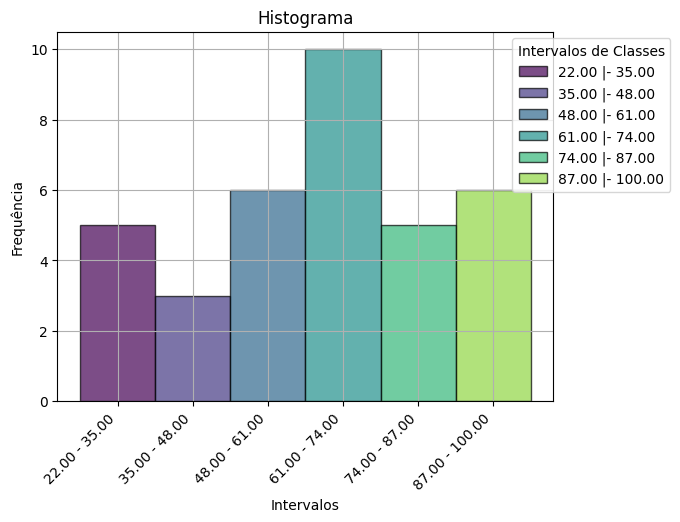

In [ ]:
# Calcule os intervalos das classes
intervalos = [(min(D) + i * H, min(D) + (i + 1) * H) for i in range(K)]

# Histograma
fig, ax = plt.subplots()
for i, intervalo in enumerate(intervalos):
    classe = [x for x in D if (x >= intervalo[0] and x < intervalo[1])]
    ax.hist(classe, bins=[intervalo[0], intervalo[1]], edgecolor='black',
            alpha=0.7, color=plt.cm.viridis(float(i) / K),
            label=f'{intervalo[0]:.2f} |- {intervalo[1]:.2f}')

plt.title('Histograma')
plt.xlabel('Intervalos')
plt.ylabel('Frequência')
plt.grid(True)
# Adicionar legenda com as classes e intervalos
legend_labels = [f'{intervalo[0]:.2f} |- {intervalo[1]:.2f}' for intervalo in
                 intervalos]
ax.legend(legend_labels, loc='upper right', title='Intervalos de Classes',
          bbox_to_anchor=(1.25, 1.0))
# Definir rótulos do eixo x como os intervalos
plt.xticks([intervalo[0] + H / 2 for intervalo in intervalos],
 [f'{intervalo[0]:.2f} - {intervalo[1]:.2f}' for intervalo in intervalos],
           rotation=45, ha='right')

plt.show()


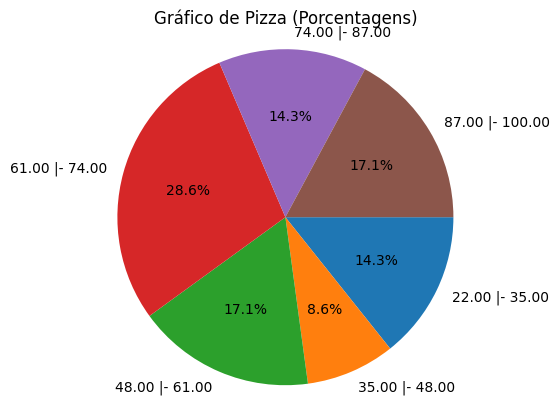

In [ ]:
# Gráfico de pizza (para as porcentagens)
porcentagens = [len([y for y in D if (y >= intervalo[0] and y < intervalo[1])]) / N * 100 for intervalo in intervalos]
classes = [f"{intervalo[0]:.2f} |- {intervalo[1]:.2f}" for intervalo in intervalos]

# Defina o ângulo inicial manualmente para a classe 1
angulo_inicial = 0

plt.pie(porcentagens, labels=classes, autopct='%1.1f%%', startangle=angulo_inicial, counterclock=False)
plt.axis('equal')
plt.title('Gráfico de Pizza (Porcentagens)')
plt.show()

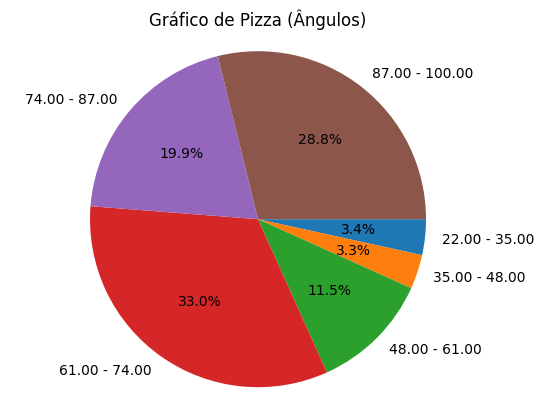

In [ ]:
# Gráfico de pizza (para os ângulos)
frequencia_acumulada = [len([y for y in D if (y >= intervalo[0] and y < intervalo[1])]) for intervalo in intervalos]
frequencia_relativa_acumulada = [sum(frequencia_acumulada[:i+1]) / N for i in range(K)]
angulos = [360 * frequencia_acumulada[i] * frequencia_relativa_acumulada[i] for i in range(K)]
classes = [f"{intervalo[0]:.2f} - {intervalo[1]:.2f}" for intervalo in intervalos]

plt.pie(angulos, labels=classes, autopct='%1.1f%%', startangle=0, counterclock=False)
plt.axis('equal')
plt.title('Gráfico de Pizza (Ângulos)')
plt.show()